# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Gautam Ghai<br>
Roll Number: 2020101020

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->

To implement Linear Regression, we need to find the best fit line for the given data. We can do this by minimizing the mean squared error which can be done by finding the gradient of the error function and updating the weights and bias accordingly. This can be done by using the gradient descent algorithm. We can find the gradient of the error function by taking the partial derivative of the error function with respect to the weights and bias. We can then update the weights and bias by subtracting the gradient of the error function from the weights and bias. We can repeat this process until the error function is minimized.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
import numpy as np
def gradients(X, y, y_hat):
    
    # X - Input.
    # y - true value.
    # y_hat - predictions.
    # w - weights 
    # b - bias     
    # m - number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db
def normalize(X):
    
   
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing 
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X
def train(X, y, bs, epochs, lr):

    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
   
    
    return w, b
    
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

x_train = np.array(x_train)
y_train = np.array(y_train)
# w, b = train(x_train, y_train, bs=100, epochs=1000, lr=0.1)
# print(w, b)



mse_dict = dict()
m, n = x_train.shape
W=np.zeros((n,1))
mse_val=100
B=0
for lr in range(1,101,1):
    w, b = train(x_train, y_train, bs=100, epochs=5000, lr=lr*0.01)
    y_pred = np.dot(x_test, w) + b
    print("MSE for lr = {} is {}".format(lr*0.01, mse(y_test, y_pred)))
    mse_dict[lr*0.01] = mse(y_test, y_pred)
    if mse_val > mse(y_test, y_pred):
        mse_val = mse(y_test, y_pred)
        W = w
        B = b

# print lr value with minimum mse
print("Minimum MSE is {} for lr = {}".format(min(mse_dict.values()), min(mse_dict, key=mse_dict.get)))
w=W
b=B


MSE for lr = 0.01 is 0.4274591255861069
MSE for lr = 0.02 is 0.44133193587253067
MSE for lr = 0.03 is 0.4439007593806204
MSE for lr = 0.04 is 0.44450212363273506
MSE for lr = 0.05 is 0.4446491291215068
MSE for lr = 0.06 is 0.44468534601048687
MSE for lr = 0.07 is 0.44469427970963926
MSE for lr = 0.08 is 0.4446964832905457
MSE for lr = 0.09 is 0.4446970266500359
MSE for lr = 0.1 is 0.4446971605811823
MSE for lr = 0.11 is 0.44469719358064036
MSE for lr = 0.12 is 0.4446972017082296
MSE for lr = 0.13 is 0.4446972037092255
MSE for lr = 0.14 is 0.44469720420167286
MSE for lr = 0.15 is 0.4446972043228174
MSE for lr = 0.16 is 0.4446972043526074
MSE for lr = 0.17 is 0.4446972043599302
MSE for lr = 0.18 is 0.4446972043617297
MSE for lr = 0.19 is 0.4446972043621714
MSE for lr = 0.2 is 0.4446972043622797
MSE for lr = 0.21 is 0.44469720436230575
MSE for lr = 0.22 is 0.444697204362312
MSE for lr = 0.23 is 0.44469720436231225
MSE for lr = 0.24 is 0.44469720436231247
MSE for lr = 0.25 is 0.44469720436

4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

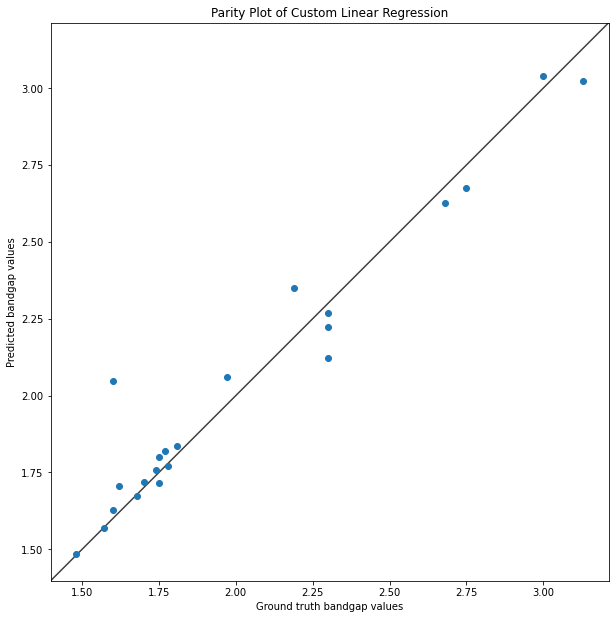

In [4]:
import matplotlib.pyplot as plt
y_pred = np.dot(x_test, w) + b


fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge Regression is a type of linear regression where the loss function is modified to reduce the complexity of the model. It is done by adding a penalty term to the loss function. The penalty term is the sum of the squares of the coefficients. This is done to prevent overfitting.

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

The parameter alpha is the regularization parameter. It is used to control the complexity of the model. It is used to prevent overfitting. The higher the value of alpha, the more the model is penalized for having high coefficients. This results in a model with lower complexity and hence lower RMSE.

alpha =  0.0 RMSE =  0.11789333386895036 Ridge score =  0.9393408079373544
alpha =  0.01 RMSE =  0.11775775658839209 Ridge score =  0.939480243802438
alpha =  0.02 RMSE =  0.11763451492589243 Ridge score =  0.9396068537623421
alpha =  0.03 RMSE =  0.1175234151293499 Ridge score =  0.9397208763822354
alpha =  0.04 RMSE =  0.11742426341959324 Ridge score =  0.9398225456015987
alpha =  0.05 RMSE =  0.11733686609135845 Ridge score =  0.9399120908344047
alpha =  0.06 RMSE =  0.11726102961387694 Ridge score =  0.939989737066864
alpha =  0.07 RMSE =  0.11719656073079943 Ridge score =  0.9400557049528
alpha =  0.08 RMSE =  0.11714326655919431 Ridge score =  0.9401102109067205
alpha =  0.09 RMSE =  0.11710095468737171 Ridge score =  0.9401534671946444
alpha =  0.1 RMSE =  0.11706943327129436 Ridge score =  0.9401856820227465
alpha =  0.11 RMSE =  0.1170485111293534 Ridge score =  0.9402070596238772
alpha =  0.12 RMSE =  0.11703799783529793 Ridge score =  0.9402178003420153
alpha =  0.13 RMSE = 

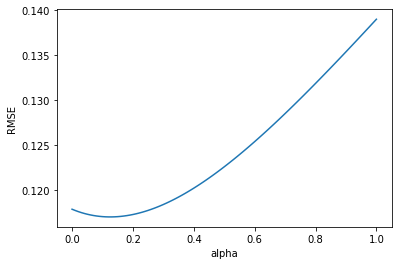

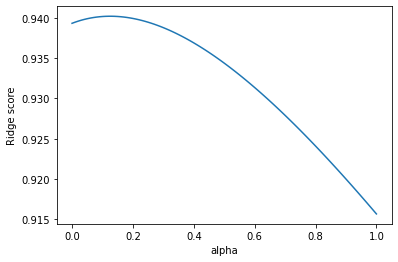

In [5]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt


alphas=[]
rmses=[]
rdgs=[]
for i in range(0,101):
    rdg = Ridge(alpha = 0.01*i)
    rdg.fit(x_train, y_train)
    y_pred = rdg.predict(x_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    print("alpha = ", 0.01*i, "RMSE = ", rms, "Ridge score = ", rdg.score(x_test, y_test))
    alphas.append(0.01*i)
    rmses.append(rms)
    rdgs.append(rdg.score(x_test, y_test))

plt.plot(alphas, rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

plt.plot(alphas, rdgs)
plt.xlabel("alpha")
plt.ylabel("Ridge score")
plt.show()



### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso Regression is a type of linear regression where the loss function is modified to reduce the complexity of the model. It is done by adding a penalty term to the loss function. The penalty term is the sum of the absolute values of the coefficients. This is done to prevent overfitting.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

The parameter alpha is the regularization parameter. It is used to control the complexity of the model. It is used to prevent overfitting. The higher the value of alpha, the more the model is penalized for having high coefficients. This results in a model with lower complexity and hence lower RMSE.

In [6]:
from sklearn.linear_model import Lasso


alphas=[]
rmses=[]
lassos=[]
for i in range(1,101):
    lasso = Lasso(alpha = 0.01*i)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    print("alpha = ", 0.01*i, "RMSE = ", rms, "Lasso score = ", lasso.score(x_test, y_test))
    alphas.append(0.01*i)
    rmses.append(rms)
    lassos.append(lasso.score(x_test, y_test))




alpha =  0.01 RMSE =  0.12612535858830703 Lasso score =  0.9305738709558882
alpha =  0.02 RMSE =  0.16145166159926083 Lasso score =  0.8862364433547084
alpha =  0.03 RMSE =  0.21073748338546983 Lasso score =  0.806178610776461
alpha =  0.04 RMSE =  0.2663426456551049 Lasso score =  0.6904010051590465
alpha =  0.05 RMSE =  0.3065250457527766 Lasso score =  0.589937500028485
alpha =  0.06 RMSE =  0.33994963067612044 Lasso score =  0.49563229503569406
alpha =  0.07 RMSE =  0.3772815961705579 Lasso score =  0.3787743705342621
alpha =  0.08 RMSE =  0.4174740206411194 Lasso score =  0.23936372652418803
alpha =  0.09 RMSE =  0.4597773555761568 Lasso score =  0.07740036300547404
alpha =  0.1 RMSE =  0.48659884809518306 Lasso score =  -0.033380533623855735
alpha =  0.11 RMSE =  0.48659884809518306 Lasso score =  -0.033380533623855735
alpha =  0.12 RMSE =  0.48659884809518306 Lasso score =  -0.033380533623855735
alpha =  0.13 RMSE =  0.48659884809518306 Lasso score =  -0.033380533623855735
alpha

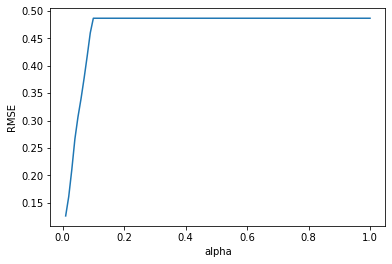

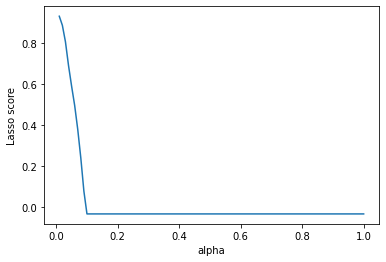

In [7]:
plt.plot(alphas, rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

plt.plot(alphas, lassos)
plt.xlabel("alpha")
plt.ylabel("Lasso score")
plt.show()